# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Chanin Nantasenamat

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

In [ ]:
! pip install lazypredict

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [ ]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

In [3]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [4]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [5]:
# Examine X dimension
X.shape

(4695, 881)

In [6]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [7]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## **4. Compare ML algorithms**

In [ ]:
# align numpy and pandas versions to fix ImportError: cannot import name 'values_from_object' from 'pandas._libs.lib' #337
!pip uninstall numpy -y
!pip install numpy==1.20.1

!pip uninstall pandas -y
!pip install pandas==1.2.2

In [8]:
import pandas as pd
# Defines and builds the lazyclassifier
# 42 algorithms 
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)

train,test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:54<00:00,  1.29s/it]


In [9]:
# Performance table of the training set (80% subset)
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.43,0.51,1.11,0.41
HistGradientBoostingRegressor,0.43,0.51,1.11,2.56
RandomForestRegressor,0.41,0.49,1.13,4.64
XGBRegressor,0.38,0.47,1.16,2.05
NuSVR,0.37,0.46,1.16,3.59
SVR,0.37,0.46,1.16,4.34
BaggingRegressor,0.36,0.45,1.17,0.56
KNeighborsRegressor,0.35,0.45,1.18,1.05
MLPRegressor,0.30,0.40,1.22,7.02


In [10]:
# Performance table of the test set (20% subset)
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.43,0.51,1.11,0.41
HistGradientBoostingRegressor,0.43,0.51,1.11,2.56
RandomForestRegressor,0.41,0.49,1.13,4.64
XGBRegressor,0.38,0.47,1.16,2.05
NuSVR,0.37,0.46,1.16,3.59
SVR,0.37,0.46,1.16,4.34
BaggingRegressor,0.36,0.45,1.17,0.56
KNeighborsRegressor,0.35,0.45,1.18,1.05
MLPRegressor,0.30,0.40,1.22,7.02


## **5. Data visualization of model performance**

[(0.0, 1.0)]

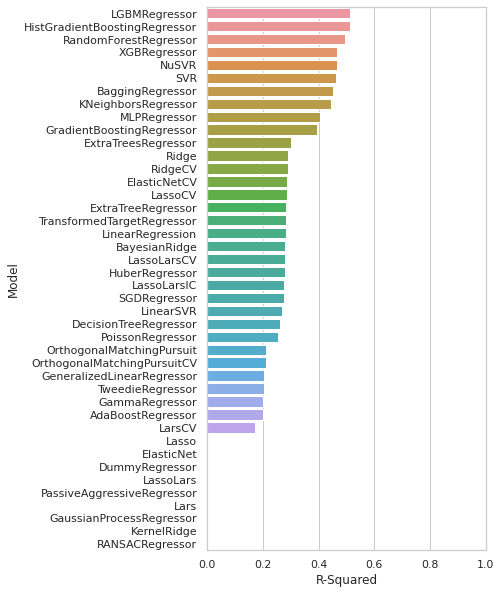

In [12]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

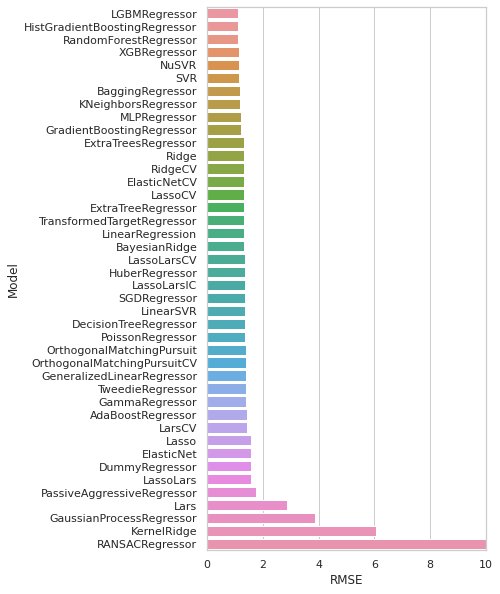

In [13]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

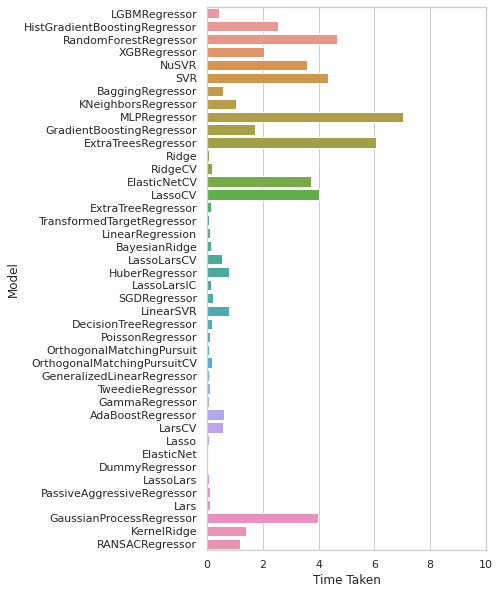

In [14]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 10))